# Universidade de Brasília - UnB

Campus UnB Gama - FGA

CURSOS: Engenharia de Software e Engenharia Eletrônica

DISCIPLINA: Tópicos Especiais em Software e Eletrônica

CONTEÚDO: Métodos Quantitativos em Finanças

ALUNO: Eduardo Sousa S. Rodrigues MATRÍCULA: 140038558

## Trabalho 1

### 1) Considerando os índices da Bovespa, pertencente aos conjuntos Setorial ou por Segmento, (i) escolha aos seu critério 5 (cinco) índices e entre esses escolhidos os 5 (cinco) papeis mais líquidos. http://www.bmfbovespa.com.br/pt_br/produtos/indices/

Os índices escolhidos são do conjunto Setorial, mais especificamente os que compõem a carteira do IMOB( Índice Imobiliário): http://www.bmfbovespa.com.br/pt_br/produtos/indices/indices-setoriais/indice-bm-fbovespa-imobiliario-imob-composicao-da-carteira.htm 

Para definir os 5 mais Líquidos, foi calculadada a média de volume diário de cada índice. Os que obtiveram maior volume diário médio, teoricamente possuem maior liquidez.

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Set 21 09:11:31 2018

@author:Eduardo S. Sales
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
#import plotly.plotly as py
#import plotly.graph_objs as go
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
#import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
#from matplotlib.finance import candlestick_ohlc
#import urllib
import xlrd
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import seaborn as sns
sns.set()

In [3]:
def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo


In [4]:
frame = []
book = xlrd.open_workbook("indices.xlsx")
for i in range(book.nsheets):
    dataframe_excel = pd.read_excel("indices.xlsx",sheet_name=i, header=0)[:-2]
    dataframe_excel['Indices']=book.sheet_names()[i]
    frame.append(dataframe_excel[:-2])
dataframe_i=pd.concat(frame)  
dataframe_i.columns = ['Codigo','Ação','Tipo','Qtd.','Part.','I_Name']
dataframe_i.head()

,Codigo,Ação,Tipo,Qtd.,Part.,I_Name
0,ABEV3,AMBEV S/A,ON,3.188072e+09,18.179,ICON
1,ALPA4,ALPARGATAS,PN N1,1.504626e+08,0.643,ICON
2,AMAR3,LOJAS MARISA,ON NM,5.307442e+07,0.070,ICON
3,ANIM3,ANIMA,ON NM,3.589651e+07,0.174,ICON
4,ARZZ3,AREZZO CO,ON ED NM,4.413731e+07,0.637,ICON


In [5]:
df_ICON = dataframe_i[dataframe_i['I_Name'] == 'ICON']
df_IDIV = dataframe_i[dataframe_i['I_Name'] == 'IDIV']
df_IEE = dataframe_i[dataframe_i['I_Name'] == 'IEE']
df_IFNC = dataframe_i[dataframe_i['I_Name'] == 'IFNC']
df_IMAT = dataframe_i[dataframe_i['I_Name'] == 'IMAT']
df_IMOB = dataframe_i[dataframe_i['I_Name'] == 'IMOB']
df_INDX = dataframe_i[dataframe_i['I_Name'] == 'INDX']
df_IVBX2 = dataframe_i[dataframe_i['I_Name'] == 'IVBX 2']
df_MLCX =  dataframe_i[dataframe_i['I_Name'] == 'MLCX']
df_SMLL = dataframe_i[dataframe_i['I_Name'] == 'SMLL']
df_UTIL = dataframe_i[dataframe_i['I_Name'] == 'UTIL']

In [6]:
def read_ind(dataframe):
    Stocks= dataframe
    #Stocks=['ALSC3','BRML3', 'BRPR3','CYRE3','DIRR3','EVEN3','EZTC3','GFSA3','HBOR3','IGTA3','MRVE3','MULT3','TEND3']
    Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

    N_months=24
    today = dt.date.today()
    E_Day = today.day; E_Month = today.month; E_Year = today.year
    day_before=today - dt.timedelta(days=N_months*365/12)
    S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

    stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
    return stocks_all

In [7]:
ativos_ICON = read_ind(df_ICON['Codigo'])

[*********************100%***********************]  52 of 52 downloaded


In [8]:
ativos_IDIV = read_ind(df_IDIV['Codigo'])

[*********************100%***********************]  31 of 31 downloaded


In [9]:
ativos_IEE = read_ind(df_IEE['Codigo'])

[*********************100%***********************]  18 of 18 downloaded


In [10]:
ativos_IFNC = read_ind(df_IFNC['Codigo'])

[*********************100%***********************]  14 of 14 downloaded


In [11]:
ativos_IMAT = read_ind(df_IMAT['Codigo'])

[*********************100%***********************]  11 of 11 downloaded


In [12]:
ativos_IMOB = read_ind(df_IMOB['Codigo'])

[*********************100%***********************]  11 of 11 downloaded


In [13]:
ativos_INDX = read_ind(df_INDX['Codigo'])

[*********************100%***********************]  42 of 42 downloaded


In [14]:
ativos_IVBX2 = read_ind(df_IVBX2['Codigo'])

[*********************100%***********************]  48 of 48 downloaded


In [15]:
ativos_IMLCX = read_ind(df_MLCX['Codigo'])

[*********************100%***********************]  59 of 59 downloaded


In [16]:
ativos_SMLL = read_ind(df_SMLL['Codigo'])

[*********************100%***********************]  75 of 75 downloaded


In [17]:
ativos_UTIL = read_ind(df_UTIL['Codigo'])

[*********************100%***********************]  20 of 20 downloaded


In [18]:
print(ativos_ICON.fillna(0).head())
print(ativos_IDIV.fillna(0).head())
print(ativos_IEE.fillna(0).head())
print(ativos_IFNC.fillna(0).head())
print(ativos_IMAT.fillna(0).head())
print(ativos_IMOB.fillna(0).head())
print(ativos_INDX.fillna(0).head())
print(ativos_IVBX2.fillna(0).head())
print(ativos_IMLCX.fillna(0).head())
print(ativos_SMLL.fillna(0).head())
print(ativos_UTIL.fillna(0).head())

                 Open                                                          \
             ABEV3.SA ALPA4.SA AMAR3.SA ANIM3.SA   ARZZ3.SA BEEF3.SA BKBR3.SA   
Date                                                                            
2016-10-19  19.639999    10.37     7.44    14.06  28.500000    10.30      0.0   
2016-10-20  19.690001    10.20     7.13    14.10  29.750000    10.20      0.0   
2016-10-21  19.670000    10.20     7.31    14.17  31.209999    10.16      0.0   
2016-10-24  19.719999    10.40     7.39    13.88  30.340000    10.20      0.0   
2016-10-25  19.620001    10.49     7.26    13.15  31.889999    10.45      0.0   

                                            ...      Volume                    \
             BRFS3.SA   BTOW3.SA CAML3.SA   ...    PARD3.SA PCAR4.SA QUAL3.SA   
Date                                        ...                                 
2016-10-19  54.270000  16.378000      0.0   ...         0.0   442400  1856900   
2016-10-20  53.299999  16.5

                 Open                                                         \
             ABEV3.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA   
Date                                                                           
2016-10-19  19.639999  17.830000  28.049999  25.818199  26.677700  32.270000   
2016-10-20  19.690001  18.180000  27.209999  25.388399  26.281000  32.000000   
2016-10-21  19.670000  18.540001  28.080000  25.652901  26.809900  32.389999   
2016-10-24  19.719999  18.650000  28.799999  25.454500  26.859501  32.400002   
2016-10-25  19.620001  18.639999  28.400000  25.305799  26.330601  31.740000   

                                                       ...       Volume  \
           BPAC11.SA BRDT3.SA   BRFS3.SA   BRKM5.SA    ...     RAIL3.SA   
Date                                                   ...                
2016-10-19       0.0      0.0  54.270000  27.790001    ...     10464900   
2016-10-20       0.0      0.0  53.299999  27.590000    ... 

In [19]:
def maisLiquidos(ativos):
    media_volume = ativos['Volume'].fillna(0).mean()
    mediaVolume = pd.DataFrame.from_dict(media_volume)
    mediaVolume.columns=["Média"]
    mediaVolume.sort_values('Média',ascending=False)
    MaisLiquidos = mediaVolume.sort_values('Média',ascending=False).iloc[:5]
    return MaisLiquidos

In [20]:
Liquidos_ICON = maisLiquidos(ativos_ICON)
Liquidos_IDIV = maisLiquidos(ativos_IDIV)
Liquidos_IEE = maisLiquidos(ativos_IEE)
Liquidos_IFNC = maisLiquidos(ativos_IFNC)
Liquidos_IMAT = maisLiquidos(ativos_IMAT)
Liquidos_IMOB = maisLiquidos(ativos_IMOB)
Liquidos_INDX = maisLiquidos(ativos_INDX)
Liquidos_IVBX2 = maisLiquidos(ativos_IVBX2)
Liquidos_IMLCX = maisLiquidos(ativos_IMLCX)
Liquidos_SMLL = maisLiquidos(ativos_SMLL)
Liquidos_UTIL = maisLiquidos(ativos_UTIL)
ativosLiquidos = [Liquidos_ICON,Liquidos_IDIV,Liquidos_IEE,Liquidos_IFNC,Liquidos_IMAT,Liquidos_IMOB,Liquidos_INDX,
                 Liquidos_IVBX2, Liquidos_IMLCX,Liquidos_SMLL,Liquidos_UTIL]
ativosLiquidos=pd.concat(ativosLiquidos)

In [21]:
all_Liquidos=ativosLiquidos.sort_values('Média',ascending=False).drop_duplicates()
all_Liquidos

,Média
PETR4.SA,4.824620e+07
ITSA4.SA,1.857257e+07
USIM5.SA,1.684135e+07
GOAU4.SA,1.564918e+07
ABEV3.SA,1.362647e+07
VALE3.SA,1.279718e+07
BBDC4.SA,1.188348e+07
ITUB4.SA,1.186235e+07
GGBR4.SA,1.071077e+07
JBSS3.SA,1.061875e+07


In [22]:
all_Liquidos.iloc[:5]

,Média
PETR4.SA,4.824620e+07
ITSA4.SA,1.857257e+07
USIM5.SA,1.684135e+07
GOAU4.SA,1.564918e+07
ABEV3.SA,1.362647e+07


In [23]:
Liquidos=pd.DataFrame(all_Liquidos.index)
#Liquidos = Liquidos.drop('Codes',axis=1).drop(0,axis=1)

In [24]:
Liquidos.columns = ['Code']

In [25]:
baixar=pd.DataFrame(Liquidos)
baixar

,Code
0,PETR4.SA
1,ITSA4.SA
2,USIM5.SA
3,GOAU4.SA
4,ABEV3.SA
5,VALE3.SA
6,BBDC4.SA
7,ITUB4.SA
8,GGBR4.SA
9,JBSS3.SA


### 2) Identifique (ii) a correlação entre os preços e os retornos. E refaça a escolha dos papeis, de forma que a correlação entre eles nunca fique acima de 0.8.

Primeiro foi separado o 5 escolhidos, em seguida separado apenas o preço de fechamento par obter os retornos deles. Por fim foi feita a correlação entre os índices em relação aos retornos e em relação aos preçõs de fechamento.

In [26]:
def read_ativ(dataframe):
    Stocks= dataframe
    Stocks=[Stocks[k] for k in range(len(Stocks))]

    N_months=24
    today = dt.date.today()
    E_Day = today.day; E_Month = today.month; E_Year = today.year
    day_before=today - dt.timedelta(days=N_months*365/12)
    S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

    stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
    return stocks_all

In [76]:
melhores_ativos = read_ativ(baixar['Code']) 

[*********************100%***********************]  34 of 34 downloaded


In [28]:
a = np.zeros((34,34), dtype=np.float64)
for i in range(34):
    for j in range(34):
        teste = melhores_ativos['Close'].fillna(0).corr().iloc[i:i+1,j:j+1]
        if (teste<0.8).bool() & (teste>-0.8).bool():
            a[i][j] = 0
        else:
            a[i][j] = 100

<IPython.core.display.Javascript object>


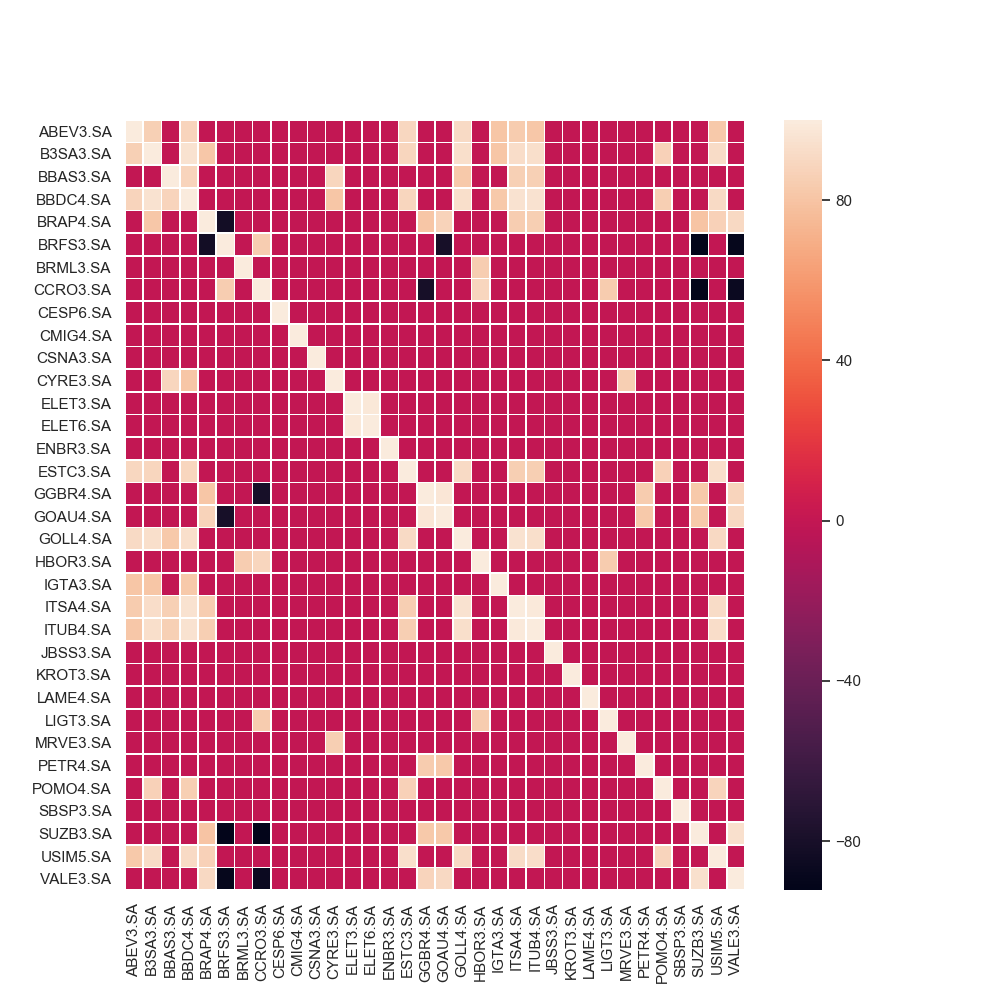

In [30]:
corre_close=melhores_ativos['Close'].fillna(0).corr()*a
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corre_close, annot=False, linewidths=.5, ax=ax)

In [ ]:
corre_close

In [37]:
Retorno = 100*(np.log(melhores_ativos['Close']).diff())

<IPython.core.display.Javascript object>


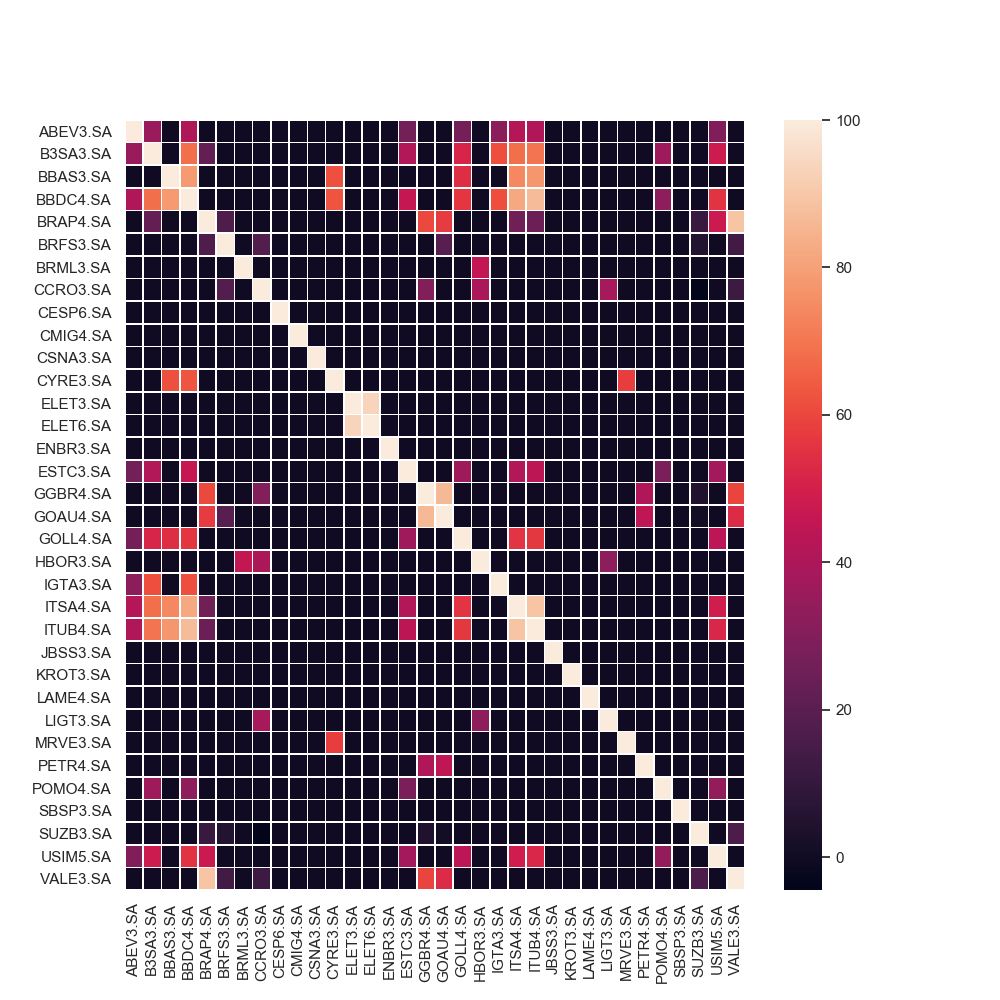

In [39]:
b = np.zeros((34,34), dtype=np.float64)
for i in range(34):
    for j in range(34):
        teste = Retorno.corr().iloc[i:i+1,j:j+1]
        if (teste<0.8).bool() & (teste>-0.8).bool():
            b[i][j] = 0
        else:
            b[i][j] = 100
            
corre_Retorno = Retorno.corr()*a
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corre_Retorno, annot=False, linewidths=.5, ax=ax)            

A partir dos Ativos mais Líquidos os que possuem correlação menor que 0.8 tanto no preço de fechamento quanto no retorno em relação ao mais Líquido (PETR4) são:

### PETR4, ITSA4, USIM5, ABEV3, VALE3


In [103]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import mpl_finance
from mpl_finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt
import csv

### 3) Apresente (iii) os gráficos de preço no formato candlestick, (iv) o gráfico de retorno, (v) o índice Sharpe e o (vi) fator Beta com relação ao índice Bovespa.

In [104]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

In [77]:
def read_ativ(dataframe):
    Stocks= dataframe
    #Stocks=['ALSC3','BRML3', 'BRPR3','CYRE3','DIRR3','EVEN3','EZTC3','GFSA3','HBOR3','IGTA3','MRVE3','MULT3','TEND3']
    Stocks=[Stocks[k] for k in range(len(Stocks))]

    N_months=24
    today = dt.date.today()
    E_Day = today.day; E_Month = today.month; E_Year = today.year
    day_before=today - dt.timedelta(days=N_months*365/12)
    S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

    stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
    return stocks_all

In [137]:
better_5 = pd.concat([baixar[0:3],baixar[4:6]])
better_5 = better_5.set_index([[0,1,2,3,4]])

In [140]:
better_5

,Code
0,PETR4.SA
1,ITSA4.SA
2,USIM5.SA
3,ABEV3.SA
4,VALE3.SA


In [141]:
escolhidos = read_ativ(better_5['Code']) 

[*********************100%***********************]  5 of 5 downloaded


ValueError: zero-size array to reduction operation maximum which has no identity

In [145]:
escolhidos_ohlc = escolhidos['Adj Close'].resample('10D').ohlc()

In [126]:
volume_escolhidos = escolhidos['Volume'].resample('10D').sum()

In [146]:
escolhidos_ohlc.reset_index(level=0, inplace=True)
escolhidos_ohlc['Date']=escolhidos_ohlc['Date'].map(mdates.date2num)

In [148]:
escolhidos_ohlc.head()

Date   ABEV3.SA                                   ITSA4.SA            \
                  open       high        low      close      open      high   
0  736256.0  18.503204  18.569021  17.957888  17.957888  7.010870  7.041886   
1  736266.0  17.704033  17.704033  16.803185  17.059216  7.321088  7.328842   
2  736276.0  17.125593  17.125593  16.404915  16.708361  7.367615  7.367615   
3  736286.0  16.423882  16.727324  16.281643  16.338537  6.809229  6.879027   
4  736296.0  16.641981  16.641981  15.608374  15.779063  6.731677  6.731677   

                        PETR4.SA    ...                            USIM5.SA  \
        low     close       open    ...            low      close      open   
0  6.855764  7.034131  17.540956    ...      17.540956  18.008848  3.663938   
1  7.018623  7.328842  17.610643    ...      15.918269  17.132795  4.490315   
2  6.646369  6.700650  16.963560    ...      13.937196  14.225895  4.241407   
3  6.669633  6.669633  14.454865    ...      14.454865  15.231364  3.972585   
4  6.340627  6.496033  15.390646    ...      14.594235  15.788852  4.560010   

                                  VALE3.SA                                   
       high       low     close       open       high        low      close  
0  4.609792  3.663938  4.609792  17.034212  20.254427  17.034212  20.254427  
1  4.490315  3.863065  4.211537  20.199537  21.160110  19.769566  21.160110  
2  4.261320  3.902891  3.922803  21.928572  24.581593  21.928572  22.632996  
3  4.510228  3.972585  4.420621  22.477474  26.438704  22.477474  26.438704  
4  4.560010  3.952672  4.141843  28.369009  28.554089  25.670246  28.554089  

[5 rows x 21 columns]

In [119]:
def graph_ohlc (ohlc, name):
    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(name)

    ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1, sharex=ax1)
    #ax1.xaxis_date()

    candlestick_ohlc(ax1, ohlc.values, width=2, colorup='g')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)

    ax2.fill_between(volume_escolhidos[name].index.map(mdates.date2num), volume_escolhidos[name].values, 0)

    for label in ax2.xaxis.get_ticklabels():
            label.set_rotation(45)

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

In [144]:
escolhidos_ohlc.set_index('Date')

ABEV3.SA                                    ITSA4.SA             \
               open       high        low      close       open       high   
Date                                                                         
736256.0  18.503204  18.569021  17.957888  17.957888   7.010870   7.041886   
736266.0  17.704033  17.704033  16.803185  17.059216   7.321088   7.328842   
736276.0  17.125593  17.125593  16.404915  16.708361   7.367615   7.367615   
736286.0  16.423882  16.727324  16.281643  16.338537   6.809229   6.879027   
736296.0  16.641981  16.641981  15.608374  15.779063   6.731677   6.731677   
736306.0  15.608374  15.816996  15.276484  15.816996   6.488263   6.527118   
736316.0  15.456654  15.552258  15.206224  15.484973   6.123059   6.462562   
736326.0  15.600316  15.994411  15.600316  15.821391   6.527188   7.028034   
736336.0  15.888677  16.446177  15.706050  16.388504   7.076508   7.270377   
736346.0  16.532684  16.705856  16.532684  16.705856   7.343089   7.561201   
736356.0  16.715509  16.744463  16.377722  16.744463   7.496574   7.666213   
736366.0  16.474232  17.391077  16.300514  17.391077   7.553123   8.102434   
736376.0  17.342821  17.642002  17.217360  17.217360   8.078202   8.569838   
736386.0  17.284916  17.284916  16.232958  16.232958   8.285374   8.351727   
736396.0  16.522488  16.754110  16.503185  16.609344   8.069733   8.260497   
736406.0  17.024340  17.169104  16.705856  17.169104   8.086329   8.086329   
736416.0  17.313869  17.632351  17.255960  17.352472   8.028270   8.102912   
736426.0  17.420029  17.420029  17.005037  17.140150   7.895574   7.961917   
736436.0  17.429680  17.680607  17.352472  17.574442   7.928747   8.003390   
736446.0  17.564796  18.365828  17.564796  18.240364   8.078035   8.360019   
736456.0  18.230711  19.128256  18.230711  19.128256   8.293667   8.542480   
736466.0  18.954536  18.954536  17.921881  18.365828   8.351727   8.351727   
736476.0  18.365828  18.365828  17.902576  18.250013   7.439423   7.489180   
736486.0  18.404428  18.404428  17.448982  17.545490   7.378381   7.503012   
736496.0  17.159452  17.603397  17.159452  17.603397   7.486397   7.494704   
736506.0  17.788389  17.827335  17.739706  17.739706   7.394998   7.561178   
736516.0  17.311308  18.255737  17.311308  18.255737   7.461471   7.669195   
736526.0  18.343365  18.382309  18.255737  18.382309   7.627645   7.710735   
736536.0  18.333628  18.888601  18.333628  18.752295   7.619336   8.026480   
736546.0  18.839920  19.190430  18.839920  19.190430   8.159421   8.234203   
...             ...        ...        ...        ...        ...        ...   
736686.0  20.783764  21.149429  20.783764  21.030836   9.216751   9.216751   
736696.0  21.436035  21.594162  21.347090  21.594162   9.275638   9.578402   
736706.0  21.347090  21.772055  21.347090  21.742405   9.595145  10.074501   
736716.0  21.643576  21.692993  21.564512  21.692993  10.326758  11.310723   
736726.0  22.039999  22.039999  21.306324  21.306324  11.108879  11.108879   
736736.0  22.049913  22.515896  22.049913  22.515896  11.007957  11.697479   
736746.0  22.208548  22.387009  21.782221  22.387009  11.899323  12.098257   
736756.0  22.327522  23.775042  22.327522  23.775042  12.246643  12.299845   
736766.0  23.755213  24.062565  23.408205  23.804787  12.219993  12.219993   
736776.0  23.715555  23.864273  23.616409  23.864273  11.811755  12.237760   
736786.0  23.646154  23.993164  23.051283  23.646154  12.166694  12.166694   
736796.0  23.090940  23.299145  22.783588  23.229744  11.971458  11.971458   
736806.0  23.249573  23.249573  22.971966  23.130598  11.705255  12.148927   
736816.0  22.476240  22.476240  21.613674  21.663248  11.359199  11.359199   
736826.0  21.524443  21.524443  20.126495  20.126495  10.968728  10.968728   
736836.0  19.977777  20.156239  19.422564  19.521709  10.675875  10.675875   
736846.0  19.769573  19.868719  18.797947  18.797947  10.116957  10.439527   
736856.0  18.827692  18.827692  1

In [132]:
escolhidos_ohlc.reset_index(level=0, inplace=True)

In [134]:
escolhidos_ohlc

index      Date   ABEV3.SA                                    ITSA4.SA  \
                         open       high        low      close       open   
0      0  736256.0  18.503204  18.569021  17.957888  17.957888   7.010870   
1      1  736266.0  17.704033  17.704033  16.803185  17.059216   7.321088   
2      2  736276.0  17.125593  17.125593  16.404915  16.708361   7.367615   
3      3  736286.0  16.423882  16.727324  16.281643  16.338537   6.809229   
4      4  736296.0  16.641981  16.641981  15.608374  15.779063   6.731677   
5      5  736306.0  15.608374  15.816996  15.276484  15.816996   6.488263   
6      6  736316.0  15.456654  15.552258  15.206224  15.484973   6.123059   
7      7  736326.0  15.600316  15.994411  15.600316  15.821391   6.527188   
8      8  736336.0  15.888677  16.446177  15.706050  16.388504   7.076508   
9      9  736346.0  16.532684  16.705856  16.532684  16.705856   7.343089   
10    10  736356.0  16.715509  16.744463  16.377722  16.744463   7.496574   
11    11  736366.0  16.474232  17.391077  16.300514  17.391077   7.553123   
12    12  736376.0  17.342821  17.642002  17.217360  17.217360   8.078202   
13    13  736386.0  17.284916  17.284916  16.232958  16.232958   8.285374   
14    14  736396.0  16.522488  16.754110  16.503185  16.609344   8.069733   
15    15  736406.0  17.024340  17.169104  16.705856  17.169104   8.086329   
16    16  736416.0  17.313869  17.632351  17.255960  17.352472   8.028270   
17    17  736426.0  17.420029  17.420029  17.005037  17.140150   7.895574   
18    18  736436.0  17.429680  17.680607  17.352472  17.574442   7.928747   
19    19  736446.0  17.564796  18.365828  17.564796  18.240364   8.078035   
20    20  736456.0  18.230711  19.128256  18.230711  19.128256   8.293667   
21    21  736466.0  18.954536  18.954536  17.921881  18.365828   8.351727   
22    22  736476.0  18.365828  18.365828  17.902576  18.250013   7.439423   
23    23  736486.0  18.404428  18.404428  17.448982  17.545490   7.378381   
24    24  736496.0  17.159452  17.603397  17.159452  17.603397   7.486397   
25    25  736506.0  17.788389  17.827335  17.739706  17.739706   7.394998   
26    26  736516.0  17.311308  18.255737  17.311308  18.255737   7.461471   
27    27  736526.0  18.343365  18.382309  18.255737  18.382309   7.627645   
28    28  736536.0  18.333628  18.888601  18.333628  18.752295   7.619336   
29    29  736546.0  18.839920  19.190430  18.839920  19.190430   8.159421   
..   ...       ...        ...        ...        ...        ...        ...   
43    43  736686.0  20.783764  21.149429  20.783764  21.030836   9.216751   
44    44  736696.0  21.436035  21.594162  21.347090  21.594162   9.275638   
45    45  736706.0  21.347090  21.772055  21.347090  21.742405   9.595145   
46    46  736716.0  21.643576  21.692993  21.564512  21.692993  10.326758   
47    47  736726.0  22.039999  22.039999  21.306324  21.306324  11.108879   
48    48  736736.0  22.049913  22.515896  22.049913  22.515896  11.007957   
49    49  736746.0  22.208548  22.387009  21.782221  22.387009  11.899323   
50    50  736756.0  22.327522  23.775042  22.327522  23.775042  12.246643   
51    51  736766.0  23.755213  24.062565  23.408205  23.804787  12.219993   
52    52  736776.0  23.715555  23.864273  23.616409  23.864273  11.811755   
53    53  736786.0  23.646154  23.993164  23.051283  23.646154  12.166694   
54    54  736796.0  23.090940  23.299145  22.783588  23.229744  11.971458   
55    55  736806.0  23.249573  23.249573  22.971966  23.130598  11.705255   
56    56  736816.0  22.476240  22.476240  21.613674  21.663248  11.359199   
57    57  736826.0  21.524443  21.524443  20.126495  20.126495  10.968728   
58    58  736836.0  19.977777  20.156239  19.422564  19.521709  10.675875   
59    59  736846.0  19.769573  19.868719  18.797947  18.797947  10.116957   
60    60  736856.0  18.827692  18.827692  18.540001  18.540001   8.992849   
61    61  736866.0  18.129999  18.219999  17.950001  17.980000   8.709380   

In [149]:
graph_ohlc(escolhidos_ohlc['ABEV3.SA'], 'ABEV3.SA')

<IPython.core.display.Javascript object>

ValueError: not enough values to unpack (expected 5, got 4)

In [ ]:
dfBRML3.to_csv('BRML3.csv')
dfMRVE3.to_csv('MRVE3.csv')
dfMULT3.to_csv('MULT3.csv')
dfCYRE3.to_csv('CYRE3.csv')
dfHBOR3.to_csv('HBOR3.csv')

dfBRML3 = pd.read_csv('BRML3.csv', parse_dates=True, index_col=0)
dfMRVE3 = pd.read_csv('MRVE3.csv', parse_dates=True, index_col=0)
dfMULT3 = pd.read_csv('MULT3.csv', parse_dates=True, index_col=0)
dfCYRE3 = pd.read_csv('CYRE3.csv', parse_dates=True, index_col=0)
dfHBOR3 = pd.read_csv('HBOR3.csv', parse_dates=True, index_col=0) 


In [ ]:
ohlc_BRML3 = dfBRML3['Adj Close'].resample('10D').ohlc()
ohlc_MRVE3 = dfMRVE3['Adj Close'].resample('10D').ohlc()
ohlc_MULT3 = dfMULT3['Adj Close'].resample('10D').ohlc()
ohlc_CYRE3 = dfCYRE3['Adj Close'].resample('10D').ohlc()
ohlc_HBOR3 = dfHBOR3['Adj Close'].resample('10D').ohlc()

volume_BRML3 = dfBRML3['Volume'].resample('10D').sum()
volume_MRVE3 = dfMRVE3['Volume'].resample('10D').sum()
volume_MULT3 = dfMULT3['Volume'].resample('10D').sum()
volume_CYRE3 = dfCYRE3['Volume'].resample('10D').sum()
volume_HBOR3 = dfHBOR3['Volume'].resample('10D').sum()

In [ ]:
ohlc_MRVE3.reset_index(level=0, inplace=True)
ohlc_BRML3.reset_index(level=0, inplace=True)
ohlc_MULT3.reset_index(level=0, inplace=True)
ohlc_CYRE3.reset_index(level=0, inplace=True)
ohlc_HBOR3.reset_index(level=0, inplace=True)

In [ ]:
ohlc_BRML3['Date']=ohlc_BRML3['Date'].map(mdates.date2num)
ohlc_MRVE3['Date']=ohlc_MRVE3['Date'].map(mdates.date2num)
ohlc_MULT3['Date']=ohlc_MULT3['Date'].map(mdates.date2num)
ohlc_CYRE3['Date']=ohlc_CYRE3['Date'].map(mdates.date2num)
ohlc_HBOR3['Date']=ohlc_HBOR3['Date'].map(mdates.date2num)

In [ ]:
def graph_ohlc (ohlc, name):
    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(name)

    ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1, sharex=ax1)
    #ax1.xaxis_date()

    candlestick_ohlc(ax1, ohlc.values, width=2, colorup='g')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)

    ax2.fill_between(volume_BRML3.index.map(mdates.date2num), volume_BRML3.values, 0)

    for label in ax2.xaxis.get_ticklabels():
            label.set_rotation(45)

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

In [ ]:
graph_ohlc(ohlc_BRML3, "BRML3")

In [ ]:
graph_ohlc(ohlc_MRVE3, "MRVE3")

In [ ]:
graph_ohlc(ohlc_MULT3,"MULT3")

In [ ]:
graph_ohlc(ohlc_CYRE3,"CYRE3")

In [ ]:
graph_ohlc(ohlc_HBOR3,"HBOR3")

In [ ]:
#fig = plt.subplots()
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(10,10))
ax[0,0].plot(dfRetorno['R_BRML3'], label='Retorno de BRML3')
ax[1,0].plot(dfRetorno['R_CYRE3'], label='Retorno 1')
ax[2,0].plot(dfRetorno['R_HBOR3'], label='Retorno 2')
ax[0,1].plot(dfRetorno['R_MRVE3'], label='Retorno 3')
ax[1,1].plot(dfRetorno['R_MULT3'], label='Retorno 4')

ax[0,0].set_ylabel("Preço [R$]")
ax[0,0].set_xlabel("Data")
ax[0,0].set_title("Retornos")
ax[0,0].legend(loc='upper left')


ax[1,0].set_ylabel("Preço [R$]")
ax[1,0].set_xlabel("Data")
ax[1,0].set_title("Retornos")
ax[1,0].legend(loc='upper left')


ax[2,0].set_ylabel("Preço [R$]")
ax[2,0].set_xlabel("Data")
ax[2,0].set_title("Retornos")
ax[2,0].legend(loc='upper left')

ax[0,1].set_ylabel("Preço [R$]")
ax[0,1].set_xlabel("Data")
ax[0,1].set_title("Retornos")
ax[0,1].legend(loc='upper left')


ax[1,1].set_ylabel("Preço [R$]")
ax[1,1].set_xlabel("Data")
ax[1,1].set_title("Retornos")
ax[1,1].legend(loc='upper left')
#plt.plot(dfRetorno['R_BRML3'])


In [ ]:
IBVS=yahoo("^BVSP",S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

In [ ]:
IBVS = pd.DataFrame.from_dict(IBVS)
retorno_IBVS = IBVS['Close'][1:].values/IBVS['Close'][0:-1].values-1

In [ ]:
retorno_IBVS